In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # this for developing things to ignore warnings

warnings.filterwarnings('ignore') #If any warning appears ignore it.

In [ ]:
df=pd.read_csv('/content/heart (1).csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


EDA & DATA CCLEANING at the same time

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
print(df.shape)
df.info()

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
#This data is is equally distributed as we can see in output , almost equal patients of 0 and 1, if any one is higher the model gets more trained on that side


<Axes: xlabel='HeartDisease'>

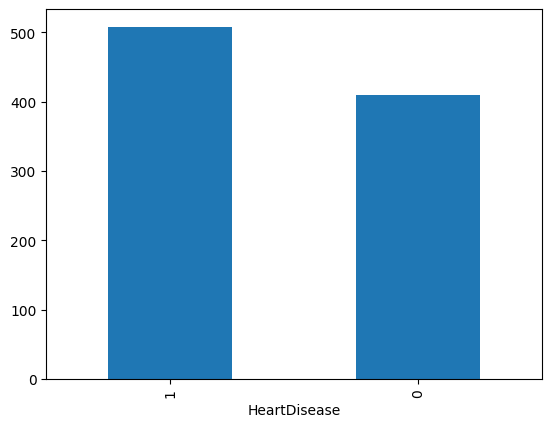

In [ ]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


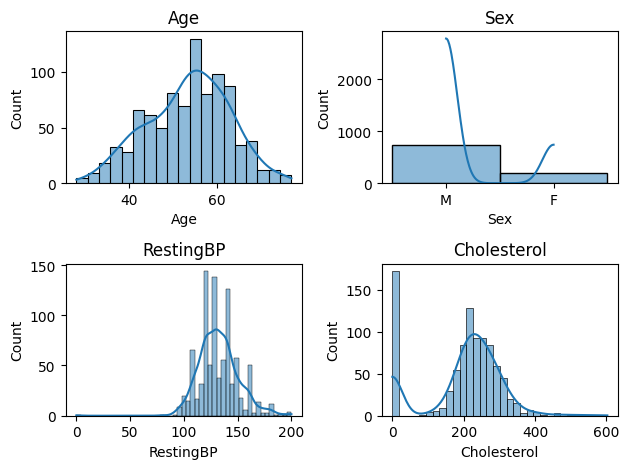

In [ ]:
def plotting(var, num):
  plt.subplot(2,2,num)
  sns.histplot(df[var], kde=True)
  plt.title(var)

plotting('Age',1)
plotting('Sex',2)
plotting('RestingBP',3)
plotting('Cholesterol',4)


plt.tight_layout()#To remove overlapping in graphs

1. Function Definition
Pythondef plotting(var, num):
  plt.subplot(2,2,num)
  sns.histplot(df[var], kde=True)
  plt.title(var)

This defines a reusable function named plotting that takes two arguments:
var: The name of the column (as a string) from the DataFrame df to plot.
num: The position in the subplot grid (1 to 4) where this plot should appear.

Inside the function:
plt.subplot(2,2,num): Creates a 2x2 grid of subplots (2 rows, 2 columns) and selects the num-th subplot to draw on.
Positions are numbered like this:
1: top-left
2: top-right
3: bottom-left
4: bottom-right


sns.histplot(df[var], kde=True): Uses Seaborn's histplot to draw a histogram of the selected column, with kde=True adding a smooth kernel density estimate curve overlaid on the histogram.
plt.title(var): Sets the title of the current subplot to the name of the variable (column).


2. Function Calls
Pythonplotting('Age',1)
plotting('Sex',2)
plotting('RestingBP',3)
plotting('Cholesterol',4)

These four lines call the function to create four separate plots:
Histogram of the Age column → placed in position 1 (top-left)
Histogram of the Sex column → position 2 (top-right)
Histogram of the RestingBP column → position 3 (bottom-left)
Histogram of the Cholesterol column → position 4 (bottom-right)


Note: Since 'Sex' is likely a categorical variable (e.g., 'M'/'F'), its histogram will show counts of each category rather than a continuous distribution. The other three are typically numerical.

Can a person have resting BP as 0?
No., but it is shown in graph , we will remove it

In [ ]:
#So although our data is clean , dont have any duplicate or null value, but still it have a wrong value

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


Above output showsthat 172 people have cholesterol 0 , but it can be 0, again a wrrong value in data


To deal with this problem , we will fill 0 s with the mean of the data

In [ ]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()  #here we are finding the mean of cholesterol , where its not 0
ch_mean

np.float64(244.6353887399464)

In [ ]:
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)

In [ ]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP']=df['RestingBP'].replace(0,resting_bp_mean)
df['RestingBP']=df['RestingBP'].round(2)
resting_bp_mean

np.float64(132.54089422028352)

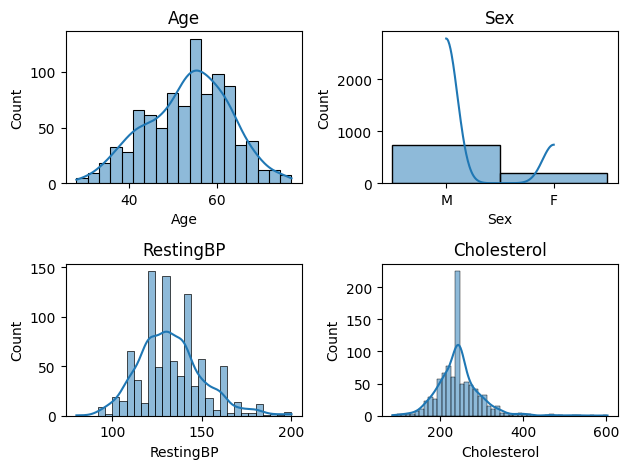

In [ ]:
def plotting(var, num):
  plt.subplot(2,2,num)
  sns.histplot(df[var], kde=True)
  plt.title(var)

plotting('Age',1)
plotting('Sex',2)
plotting('RestingBP',3)
plotting('Cholesterol',4)


plt.tight_layout()#To remove overlapping in graphs

In [ ]:
pip install sheryanalysis==0.1.0

In [ ]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report


INFO:sheryanalysis:
🔍 Basic Analysis Report


------------------------------------------------------------


INFO:sheryanalysis:------------------------------------------------------------


📏 Shape: (918, 12)


INFO:sheryanalysis:📏 Shape: (918, 12)


🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


INFO:sheryanalysis:🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']



✅ No null values found


INFO:sheryanalysis:
✅ No null values found



🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


INFO:sheryanalysis:
🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']



🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


INFO:sheryanalysis:
🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

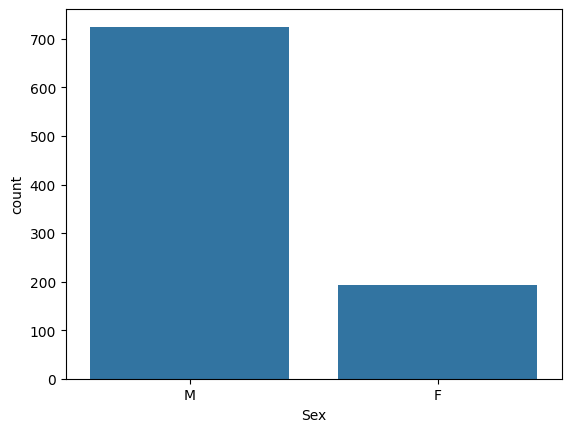

In [ ]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

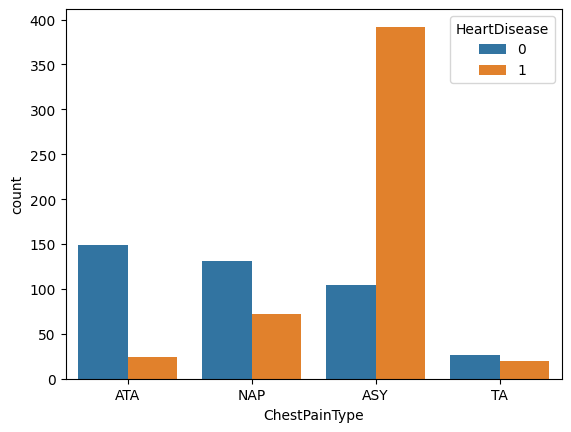

In [ ]:
sns.countplot(x=df['ChestPainType'],hue= df['HeartDisease'])

This output means If ATA patient has chest pain , the chances of heart disease is very less,

And ASY patients have high heart disease chances

<Axes: xlabel='Sex', ylabel='count'>

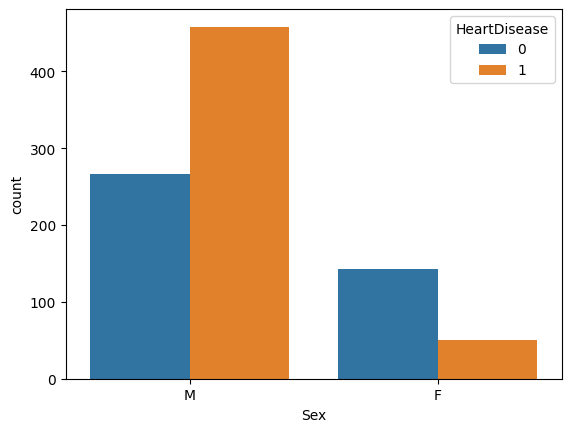

In [ ]:
sns.countplot(x=df['Sex'],hue= df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

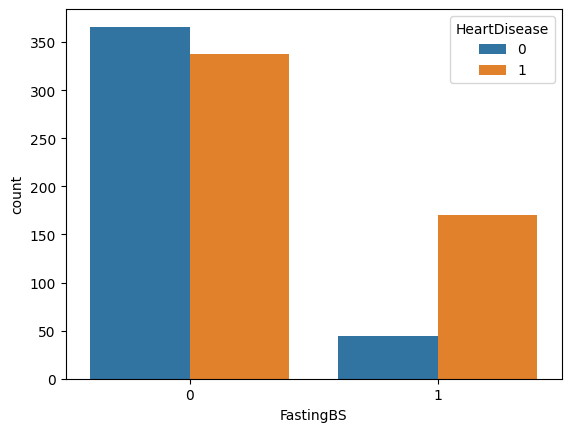

In [ ]:
sns.countplot(x=df['FastingBS'],hue= df['HeartDisease'])

<Axes: xlabel='Cholesterol'>

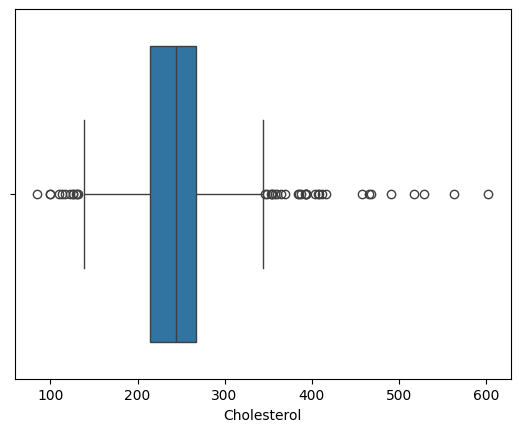

In [ ]:
#Boxplot can compare one numeric and one categorical column

sns.boxplot(x='Cholesterol',data=df)

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

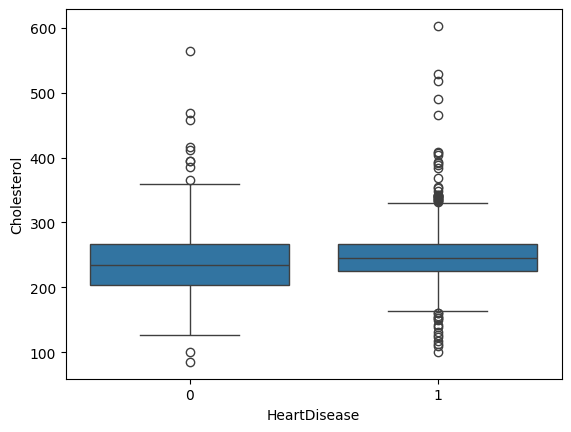

In [ ]:
sns.boxplot(x='HeartDisease', y='Cholesterol',data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

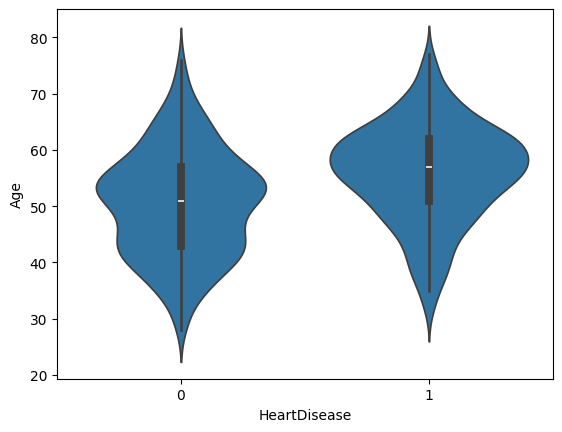

In [ ]:
sns.violinplot(x='HeartDisease', y='Age',data=df)

<Axes: >

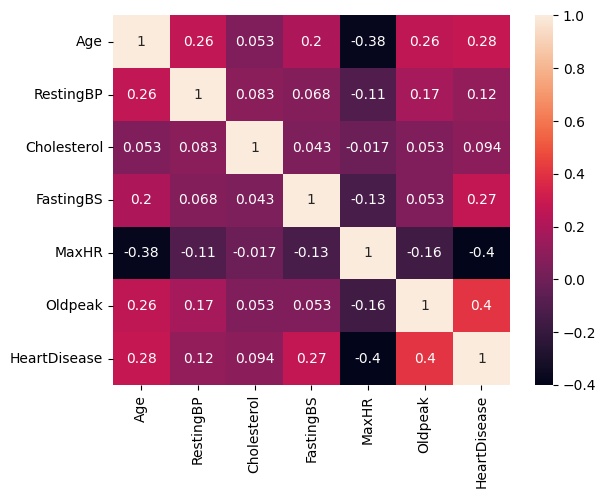

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

DATA PREPROCESSING AND CLEANING

In [ ]:
df_encode=pd.get_dummies(df,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138.0,214.0,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150.0,195.0,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130.0,236.0,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [ ]:
df_encode=pd.get_dummies(df,drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [ ]:
df_encode=df_encode.astype(int)
df_encode


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


STANDARD SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols= ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
scaler=StandardScaler()
df_encode[num_cols]=scaler.fit_transform(df_encode[num_cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [ ]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
    'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
    'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'
]

correlations = {
    feature: pearsonr(df_encode[feature], df_encode['HeartDisease'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
12,ST_Slope_Flat,0.554134
11,ExerciseAngina_Y,0.494282
4,Oldpeak,0.392385
5,Sex_M,0.305445
0,Age,0.282039
1,RestingBP,0.117909
10,RestingECG_ST,0.102527
2,Cholesterol,0.092586
8,ChestPainType_TA,-0.054790
9,RestingECG_Normal,-0.091580


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
x=df_encode.drop('HeartDisease',axis=1)
y=df_encode['HeartDisease']

In [ ]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,0,-0.188999,0.282891,1,0,0,1,1,0,0,1,0
914,1.536902,0.637353,-0.966725,1,0.164684,2.303858,1,0,0,0,1,0,0,1,0
915,0.370100,-0.141284,-2.130180,0,-0.857069,0.282891,1,0,0,0,1,0,1,1,0
916,0.370100,-0.141284,-0.159813,0,1.461525,-0.727592,0,1,0,0,0,0,0,1,0


In [ ]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

TRAINING ALL CLASSIFICATION MODELS IN ONE GO

In [ ]:
models={
    "logistic regression": LogisticRegression(),
    "knn": KNeighborsClassifier(),
    "svm": SVC(),
    "decision tree": DecisionTreeClassifier(),
    "naive bayes": GaussianNB()
}


In [ ]:
result= []

In [ ]:
for name,model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  accuracy=accuracy_score(y_test, y_pred)
  f1=f1_score(y_test,y_pred)
  result.append({"model": name, "accuracy": round(accuracy,4),"f1_score" :round(f1,4)})

In [ ]:
result

[{'model': 'logistic regression', 'accuracy': 0.8696, 'f1_score': 0.8857},
 {'model': 'knn', 'accuracy': 0.8641, 'f1_score': 0.8815},
 {'model': 'svm', 'accuracy': 0.8478, 'f1_score': 0.8679},
 {'model': 'decision tree', 'accuracy': 0.75, 'f1_score': 0.7723},
 {'model': 'naive bayes', 'accuracy': 0.8533, 'f1_score': 0.8683}]

LOGISTIC REGRESSION has highest accuracy among all models 86%

PICKLE FILE

In [ ]:
import joblib
joblib.dump(models['logistic regression'],'logistic_heart_disease_model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(x.columns.tolist(), 'logistic_columns_heart.pkl')

['logistic_columns_heart.pkl']

FRONTEND DEVELOPMENT

In [ ]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.9 MB/s eta 0:00:00


To use `pyngrok`, you need to add your ngrok authtoken to Colab's secrets manager.

1. Go to the ngrok website (https://dashboard.ngrok.com/signup) and create an account.
2. Get your authtoken from the ngrok dashboard (https://dashboard.ngrok.com/get-started/your-authtoken).
3. In Colab, click on the "🔑" icon in the left sidebar to open the Secrets manager.
4. Click "New secret", set the name to `NGROK_AUTH_TOKEN`, and paste your authtoken in the "Value" field.
5. Make sure "Notebook access" is checked.

In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model_ = joblib.load('/content/logistic_heart_disease_model.pkl')
scaler_ = joblib.load('/content/scaler.pkl')
expected_columns = joblib.load('/content/logistic_columns_heart.pkl')

st.title("HEART STROKE PREDICTION BY GAURAV SINGH BISHT😍😁")
st.markdown("Provide the following details")

age = st.slider("Age", 18, 100, 40)
sex = st.selectbox("Sex", ['Male', 'Female'])
chestpain = st.selectbox("Chest Pain Type", ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
resting_bp = st.slider("Resting BP (mm Hg)", 0, 200, 120)
cholesterol = st.slider("Cholesterol (mm Hg)", 0, 600, 200)
fasting_bs = st.selectbox("Fasting Blood Sugar", ['0', '1'])
resting_ecg = st.selectbox("Resting ECG Results", ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'])
max_hr = st.slider("Maximum Heart Rate", 0, 200, 100)
exercise_angina = st.selectbox("Exercise Induced Angina", ['No', 'Yes'])
oldpeak = st.slider("ST depression induced by exercise", 0.0, 6.0, 1.0)
st_slope = st.selectbox("Slope of peak exercise ST segment", ['Upsloping', 'Flat', 'Downsloping'])

if st.button("Predict"):
    raw_input = {
        'Age': age,
        'Sex': sex,
        'ChestPainType': chestpain,
        'RestingBP': resting_bp,
        'Cholesterol': cholesterol,
        'FastingBS': fasting_bs,
        'RestingECG': resting_ecg,
        'MaxHR': max_hr,
        'ExerciseAngina': exercise_angina,
        'Oldpeak': oldpeak,
        'ST_Slope': st_slope
    }
    input_df = pd.DataFrame([raw_input])
    for col in expected_columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[expected_columns]
    scaled_input = scaler_.transform(input_df)
    prediction = model_.predict(scaled_input)[0]

    if prediction == 1:
        st.error("Heart Disease Detected")
    else:
        st.success("No Heart Disease Detected")


Overwriting app.py


In [ ]:
from pyngrok import ngrok, conf
import subprocess, time

# ✅ Paste your actual ngrok auth token below
NGROK_AUTH_TOKEN = "34KQAlMvg6bYyCQ4QwW3POhSNTV_6chaAZUtHFxqPHovTEJw4"

# Set the auth token (only once per session)
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Kill any previous tunnels if open
ngrok.kill()

# Start Streamlit app in background (non-blocking)
process = subprocess.Popen(
    ["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

# Wait for Streamlit to start
time.sleep(7)

# Create a public tunnel to port 8501
public_url = ngrok.connect(8501)
print("✅ Your Streamlit app is live here 👇\n")
print(public_url.public_url)


✅ Your Streamlit app is live here 👇

https://hooflike-unrubrically-valencia.ngrok-free.dev
